1. 연도별 전체온실가스배출량과 1인당인구배출량이 가장 높은 광역시

2019


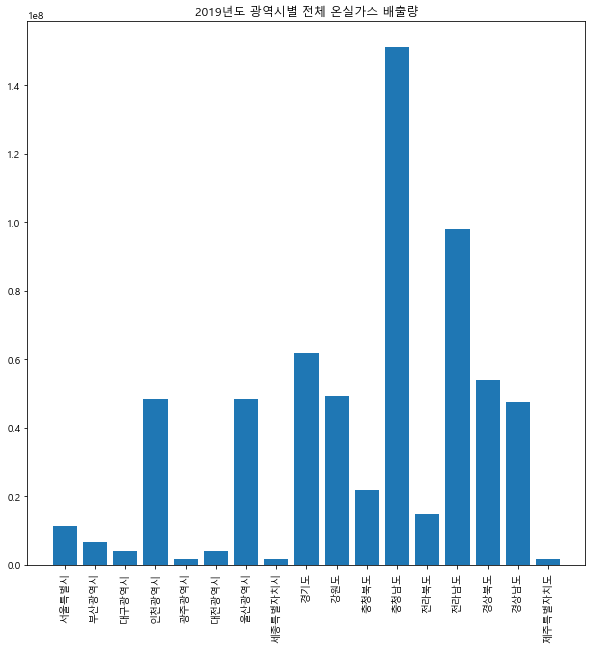

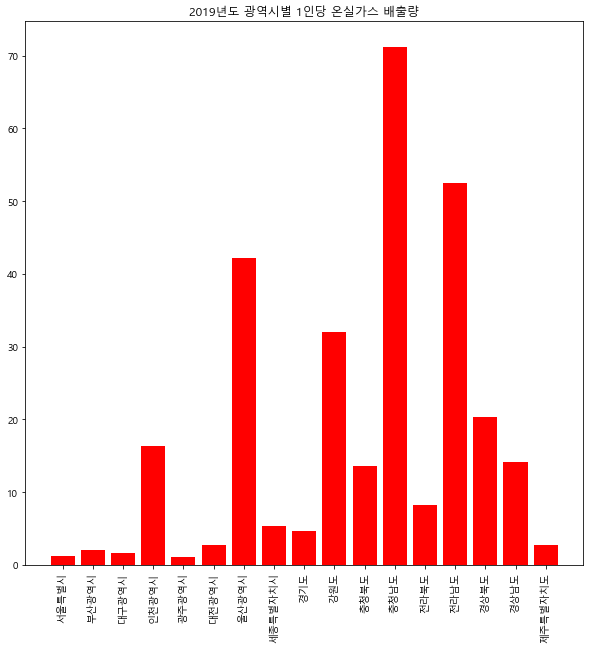

In [23]:
import csv
import matplotlib.pyplot as plt
f = open('광역시도별온실가스배출량.csv')
data = csv.reader(f)

next(data)

year = int(input())
total = []
one = []
city = []

for row in data:
    row[2] = int(row[2])
    if row[3] == '':
        row[3] = 0
    row[3] = float(row[3])
    row[0] = int(row[0])
    if row[0] == year:
        total.append(row[2])
        one.append(row[3])
        city.append(row[1])                 

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (10, 10))
plt.title(str(year) + '년도 광역시별 전체 온실가스 배출량')
plt.bar(range(17), total)
plt.xticks(range(17), city, rotation = 90)
plt.savefig(str(year)+'광역시별 전체 온실가스 배출량.png')
plt.show()


plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (10, 10))
plt.title(str(year) + '년도 광역시별 1인당 온실가스 배출량')
plt.bar(range(17), one, color = 'r')
plt.xticks(range(17), city, rotation = 90)
plt.savefig(str(year)+'광역시별 1인당 온실가스 배출량.png')
plt.show()


2. 충청남도의 온실가스배출량 증가 추이

<ipython-input-24-b9afbe4dc019>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


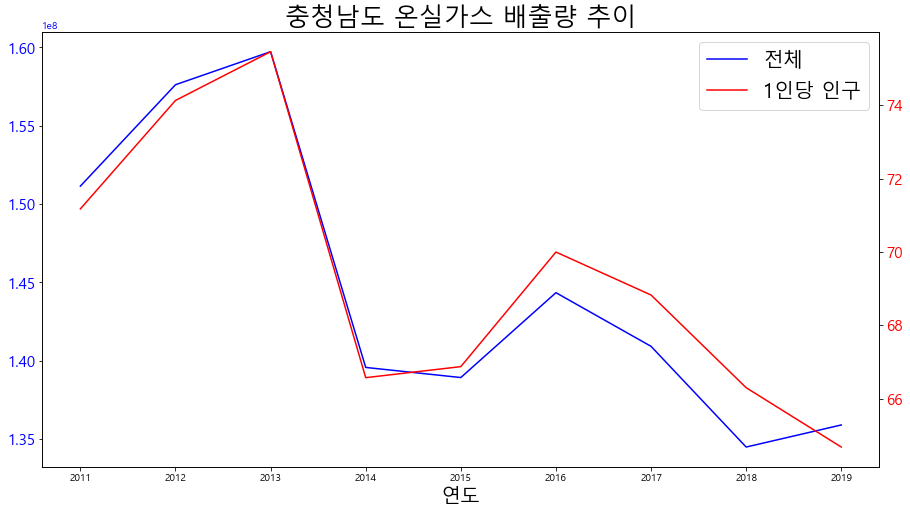

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('광역시도별온실가스배출량.csv')
data = csv.reader(f)
next(data)

city = '충청남도'
total = []
one = []
year = []

for row in data:
    row[2] = int(row[2])
    if row[3] == '':
        row[3] = 0
    row[3] = float(row[3])
    if city in row[1]:
        total.append(row[2])
        one.append(row[3])
        year.append(row[0])

plt.rc('font', family = 'Malgun Gothic')

fig = plt.figure(figsize = (15, 8))
fig.set_facecolor('white')
plt.title(city + ' 온실가스 배출량 추이', fontsize = 25)
year.sort()
plt.xticks(range(9), year)
ax1 = fig.add_subplot()

line1 = ax1.plot(total, color = 'b', label= '전체')
ax1.set_xlabel('연도', fontsize = 20)
ax1.tick_params(axis = 'y', labelcolor = 'b', labelsize = 15)

ax2 = ax1.twinx()
line2 = ax2.plot(one, color = 'r', label = '1인당 인구')
ax2.tick_params(axis = 'y', labelcolor = 'r', labelsize = 15)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc = 'upper right', fontsize = 20)

plt.savefig('충청남도 온실가스 배출량 추이.png')
plt.show()

3. 관리업체 1개당 온실가스배출량과 사업장 1개당 온실가스배출량 차이 

<ipython-input-25-6f5522e23d65>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


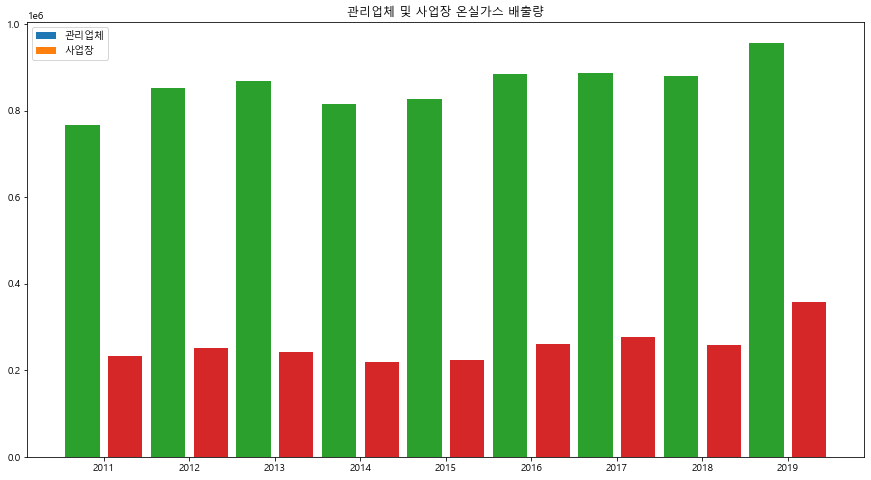

In [25]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = open('광역시도별온실가스배출량.csv')
data = csv.reader(f)
next(data)

city = '충청남도'
on = []
off = []
year = []

for row in data:
    if city in row[1]:
        on.append(float(row[4]))
        off.append(float(row[5]))
        year.append(row[0])

plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (15,8))
plt.title('관리업체 및 사업장 온실가스 배출량')
year.sort()

n = 1
t = 2
d = 9
w = 1
on_values = [t*element + w * n for element in range(d)]
plt.bar(on_values, on, label = '관리업체')
# plt.plot(on, marker='o', markersize=10)

n = 2
t = 2
d = 9
w = 1
off_values = [t*element + w * n for element in range(d)]
plt.bar(off_values, off, label = '사업장')

ax = plt.subplot()
ax.bar(on_values, on)
ax.bar(off_values, off)

middle = [(a+b)/2 for (a,b) in zip(on_values, off_values)]
ax.set_xticks(middle)
ax.set_xticklabels(year)

plt.legend()
plt.savefig('관리업체 및 사업장 온실가스 배출량.png')
plt.show()